In [8]:
import numpy as np
from PIL import Image
import os
import imagehash
import tqdm

def are_images_similar(image_path1, image_path2, hash_size=8):
    hash1 = imagehash.phash(Image.open(image_path1), hash_size)
    hash2 = imagehash.phash(Image.open(image_path2), hash_size)
    
    return hash1 - hash2 == 0


def check_image_folder(folder_path1, folder_path2):
    # list all files in folder_path1
    files1 = os.listdir(folder_path1)
    files2 = os.listdir(folder_path2)
    # Keep only the files that have the same name
    files_overlap = set(files1) & set(files2)
    # non-identical files
    non_identical_files = []
    for file in tqdm.tqdm(files_overlap):
        if not are_images_similar(os.path.join(folder_path1, file), os.path.join(folder_path2, file)):
            non_identical_files.append(file)
    return non_identical_files


In [9]:
non_identical_files = check_image_folder("./data/normed_tiles_torchstain", "../../E2E_VIZ/histopath/tests/FFPE/output_success/TCGA-3L-AA1B-01Z-00-DX2/tiles")
print(non_identical_files)

100%|██████████| 1520/1520 [00:21<00:00, 70.48it/s]

[]


## RGB and HSV histograms

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_rgb_histogram(image_path):
    # Plot RGB histogram for a single image
    img = Image.open(image_path)
    # Convert to RGB if it's not already
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Get the RGB values
    r, g, b = img.split()

    # Plot histograms for each channel
    plt.figure(figsize=(12, 4))
    
    # RGB Histogram
    plt.subplot(1, 3, 1)
    plt.hist(r.histogram(), bins=256, range=(0, 256), color='red', alpha=0.5)
    plt.title('Red Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Green Channel
    plt.subplot(1, 3, 2)
    plt.hist(g.histogram(), bins=256, range=(0, 256), color='green', alpha=0.5)
    plt.title('Green Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Blue Channel 
    plt.subplot(1, 3, 3)
    plt.hist(b.histogram(), bins=256, range=(0, 256), color='blue', alpha=0.5)
    plt.title('Blue Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


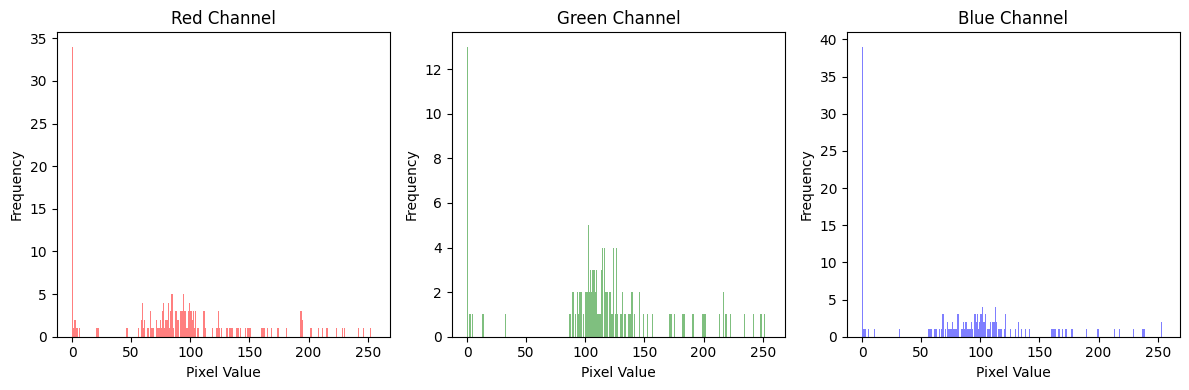

In [5]:
plot_rgb_histogram("./data/normed_tiles_torchstain/TCGA-3L-AA1B-01Z-00-DX2_63488_10240_size_512_mag_20.png")

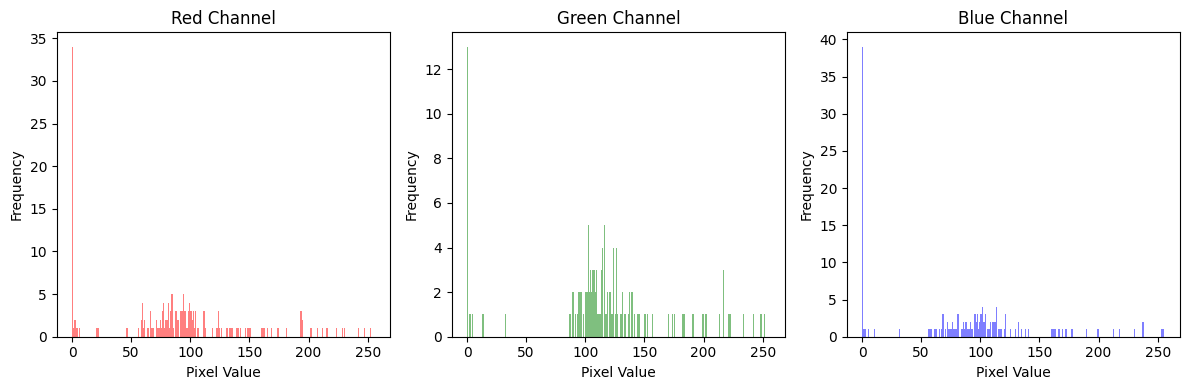

In [6]:
plot_rgb_histogram("../../E2E_VIZ/histopath/tests/FFPE/output_success/TCGA-3L-AA1B-01Z-00-DX2/tiles/TCGA-3L-AA1B-01Z-00-DX2_63488_10240_size_512_mag_20.png")